In [65]:
import pandas
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

## Spring 2021

In [92]:
df = pandas.read_csv('BF528 - Background Survey - SP2021_February 1, 2021_11.22 - scrubbed.csv',index_col=0)
df.shape

(49, 35)

In [100]:
features = [_ for _ in df if '_' in _]
scaled = StandardScaler().fit_transform(df[features])
ncomp = 5
pca = PCA(n_components=ncomp)
pca_proj = pca.fit_transform(scaled)
pca_df = pandas.DataFrame(
    pca_proj,
    columns=['pc{}'.format(_) for _ in range(ncomp)],
    index=df.index
)
df = df.merge(pca_df,left_index=True,right_index=True)
pca.explained_variance_ratio_

array([0.40978279, 0.17030485, 0.06042143, 0.04820895, 0.03756313])

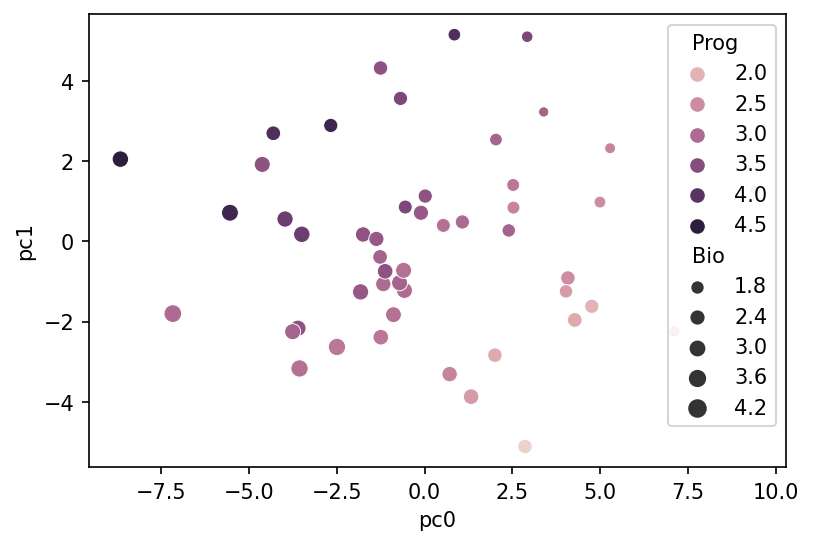

In [96]:
plt.figure(dpi=150)
sns.scatterplot(
    x='pc0',
    y='pc1',
    data=df,
    hue='Prog',
    size='Bio'
)

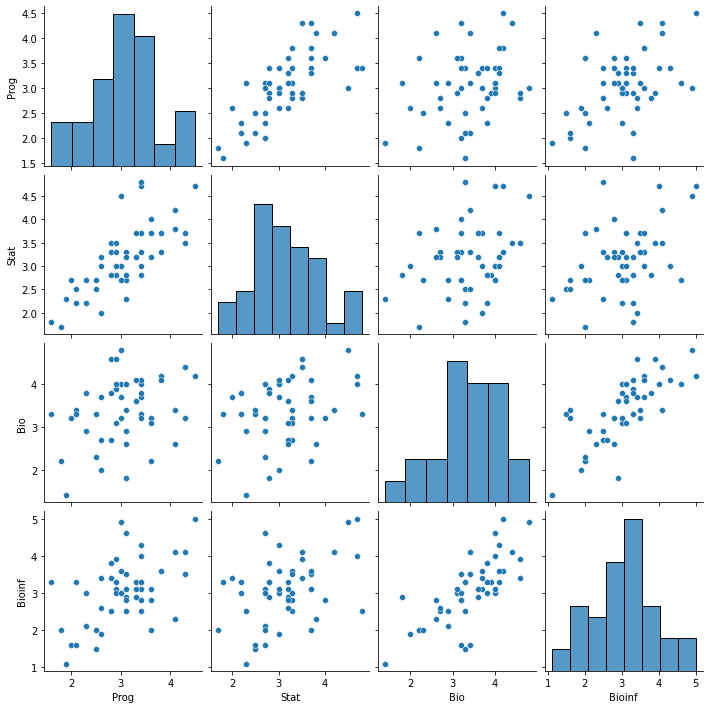

In [97]:
sns.pairplot(df[['Prog','Stat','Bio','Bioinf']])

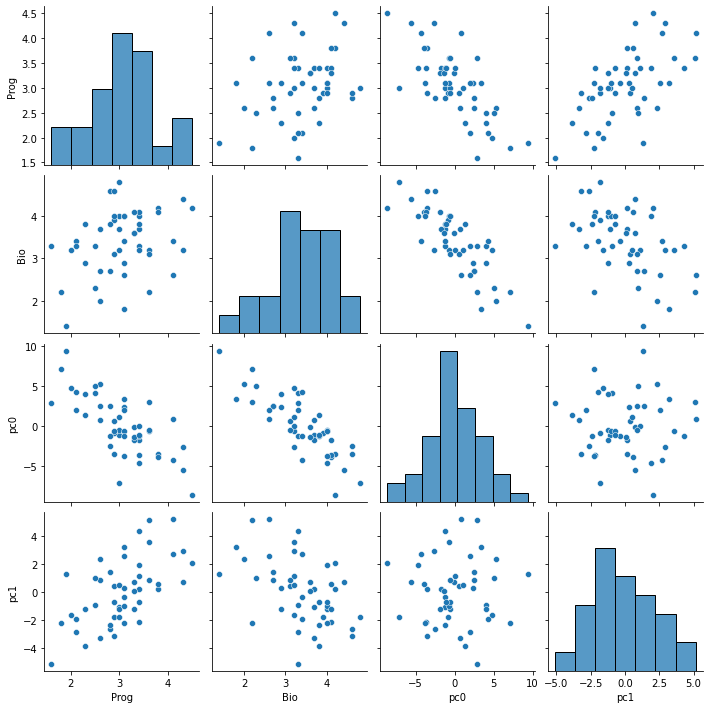

In [98]:
sns.pairplot(df[['Prog','Bio','pc0','pc1']])

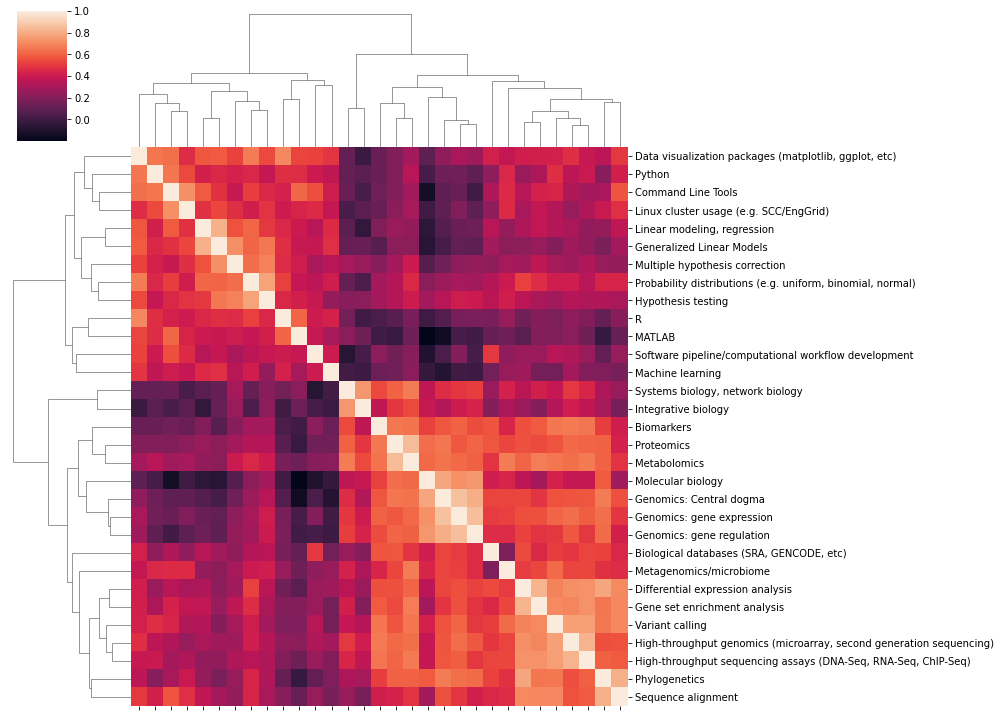

In [99]:
colmap = {
    'Prog_1':'Python',
    'Prog_2':'R',
    'Prog_3':'MATLAB',
    'Prog_4':'Command Line Tools',
    'Prog_5':'Linux cluster usage (e.g. SCC/EngGrid)',
    'Prog_6':'Software pipeline/computational workflow development',
    'Prog_7':'Data visualization packages (matplotlib, ggplot, etc)',
    'Prog_8':'Biological databases (SRA, GENCODE, etc)',
    'Stat_1':'Probability distributions (e.g. uniform, binomial, normal)',
    'Stat_2':'Hypothesis testing',
    'Stat_3':'Multiple hypothesis correction',
    'Stat_4':'Linear modeling, regression',
    'Stat_5':'Generalized Linear Models',
    'Stat_6':'Machine learning',
    'Bio_1':'Molecular biology',
    'Bio_2':'Genomics: Central dogma',
    'Bio_3':'Genomics: gene expression',
    'Bio_4':'Genomics: gene regulation',
    'Bio_5':'Proteomics',
    'Bio_6':'Metabolomics',
    'Bio_7':'Metagenomics/microbiome',
    'Bio_8':'Systems biology, network biology',
    'Bio_9':'Integrative biology',
    'Bioinf_1':'High-throughput genomics (microarray, second generation sequencing)',
    'Bioinf_2':'High-throughput sequencing assays (DNA-Seq, RNA-Seq, ChIP-Seq)',
    'Bioinf_3':'Differential expression analysis',
    'Bioinf_4':'Phylogenetics',
    'Bioinf_5':'Sequence alignment',
    'Bioinf_6':'Variant calling',
    'Bioinf_7':'Gene set enrichment analysis',
    'Bioinf_8':'Biomarkers',
}

sns.clustermap(
    df[features].corr(),
    xticklabels=['' for _ in features],
    yticklabels=[colmap[_] for _ in features],
    figsize=(14,10)
)